# Mean Absolute Error
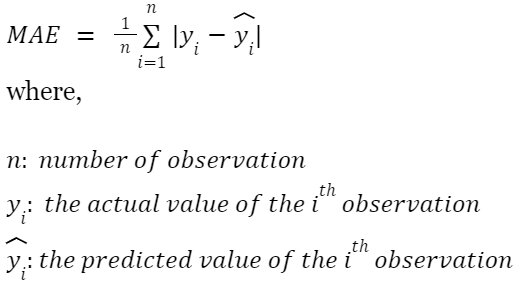 

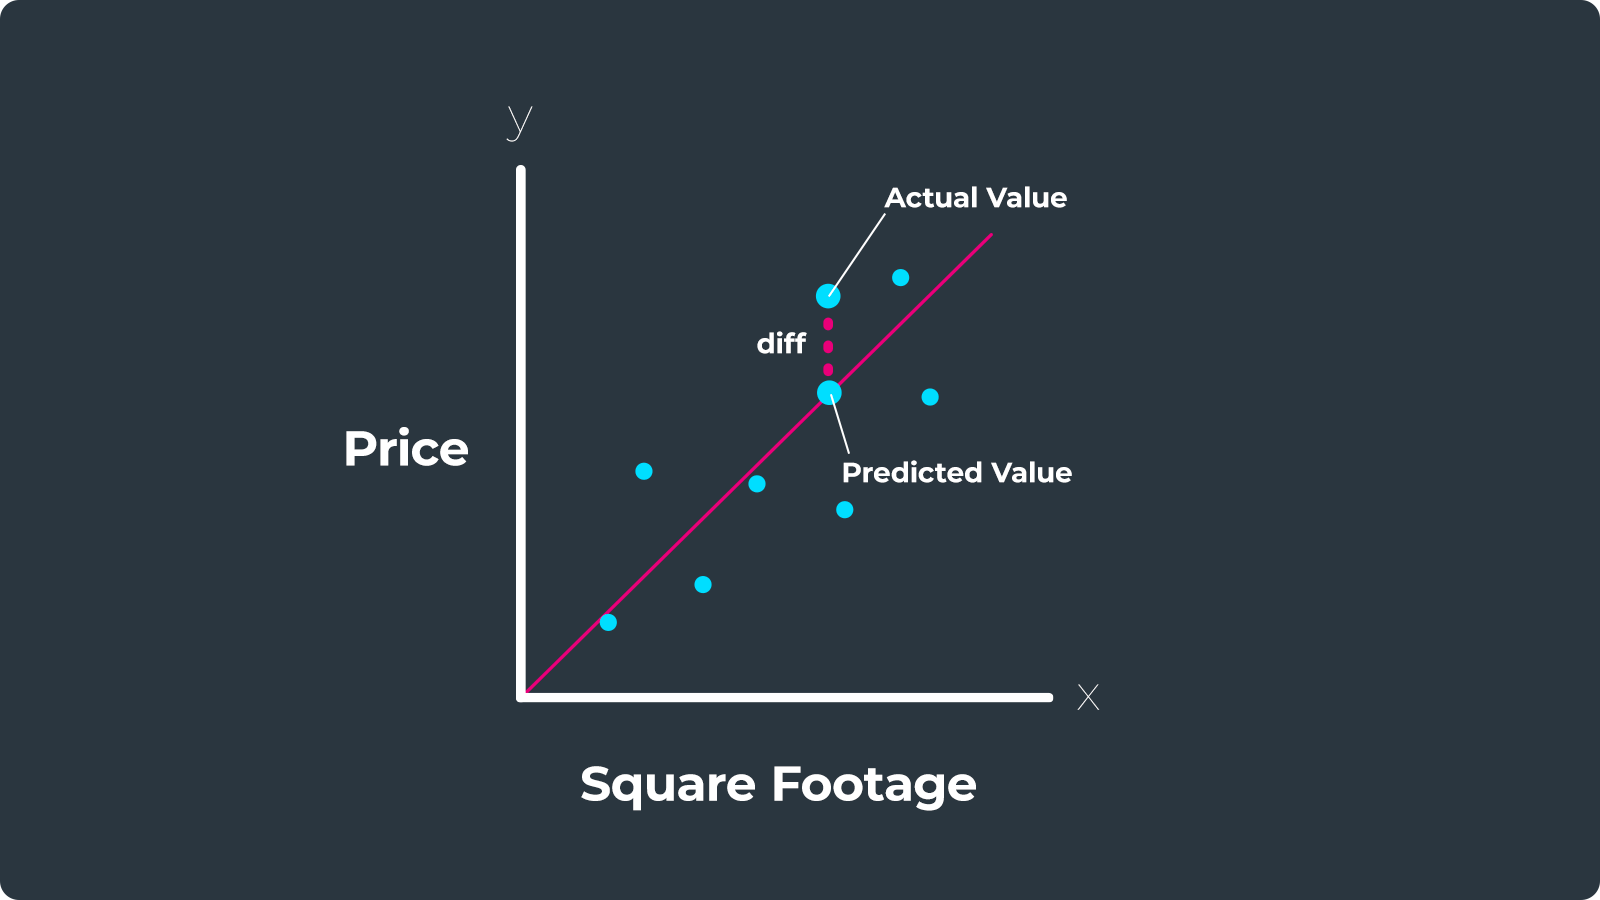

## Advantages 

- MAE has same unit of measurement with respect to target variable i.e [y]
- Robust for Outliers i.e MAE can handle Outliers well 

## Disadvantages

- Graph is not differentiable (If the function is not continuous then it is not differentiable, i.e. when there is a gap or a jump in the graph of the function then it is not continuous hence not differentiable.)

 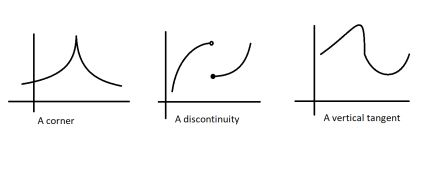

# Mean Squared Error

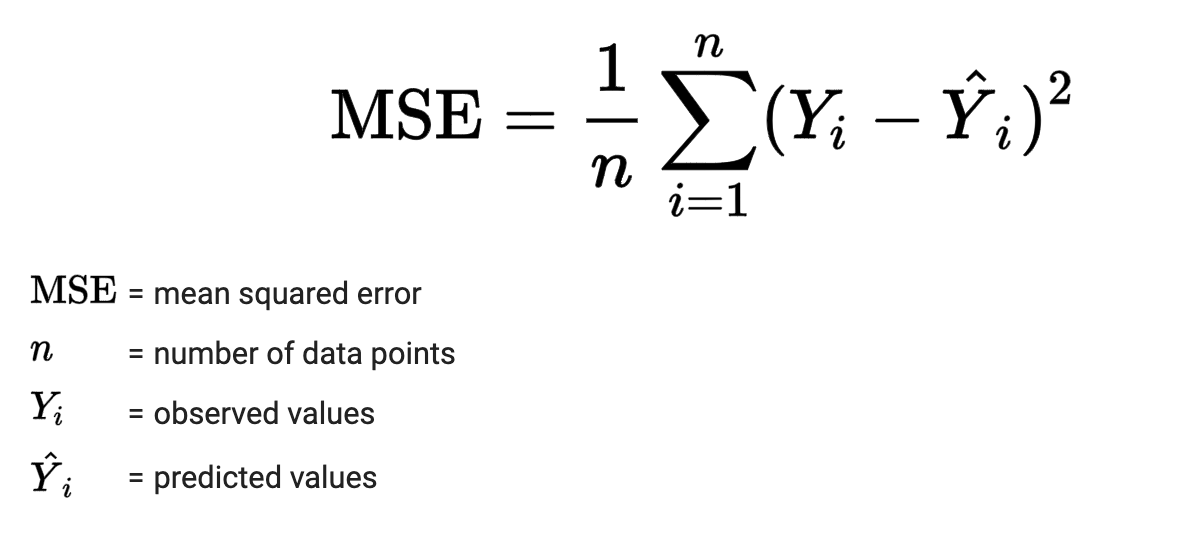

## Advantages

- MSE can be used as "Loss Function" as the graph is differentiable .

 NOTE:
 The loss function, also referred to as the error function, is a crucial component in machine learning that quantifies the difference between the predicted outputs of a machine learning algorithm and the actual target values.

## Disadvantages

- MSE unit of measurement is not same as target variable(y), its unit is square of the given unit in the dataset
- Not Robust to outliers 

# Root Mean Squared Error

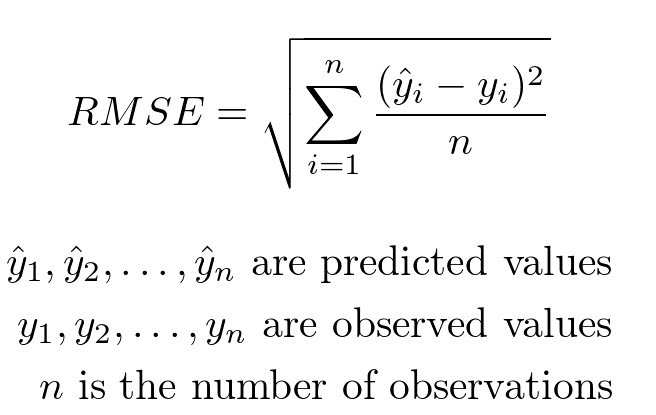

## Advantages 

- In RMSE unit is same as the target variable(y)

## Disadvantages

- Not Robust to outliers

# R2 score or Coefficient of Determination or Goodness of Fit

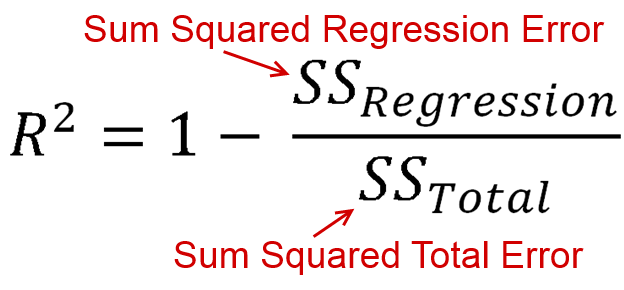

NOTE : A good model will have R2 score close to 1 (one) , where as a bad model will have R2 score closer to 0 (Zero) 
- In worst case scenario R2 score is negetive it means model is performing the worst !
- for example R2 score is 0.80 it means "80 % amount of variance/difference is explained by the input variables of the model to dtermine the y variable"

## Drawbacks of R2 score

- R2 score either increases or remains same if any irrelevant input variables are added which do not help in getting the target variable

# Adjusted R2 score

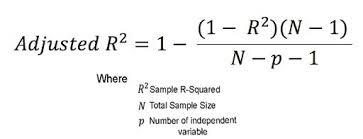

 - This metric removes the drawback that is seen in R2 score 

# Implementation of Regression Evaluation Metrics 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
df = pd.read_csv('https://github.com/campusx-official/100-days-of-machine-learning/raw/main/day49-regression-metrics/placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

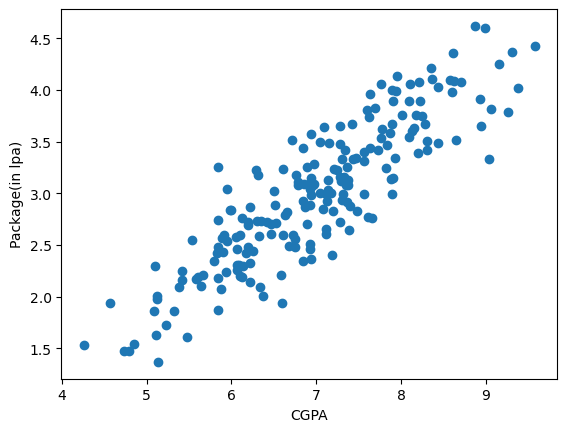

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [6]:
df.columns

Index(['cgpa', 'package'], dtype='object')

In [12]:
# define x and y 
y = df['package']
x = df[['cgpa']]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

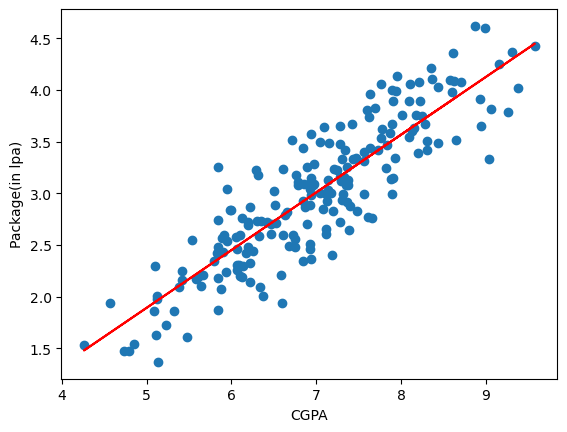

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
y_pred = lr.predict(x_test)

In [19]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [20]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [21]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [22]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [23]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [25]:
# Adjusted R2 score
x_test.shape

(40, 1)

In [26]:
# using the formula of adjusted r2 score calculating the adjusted r2 score
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415